In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Import

In [17]:
telco_data = pd.read_csv('/content/drive/MyDrive/Data Analyst A - Z/Lecture 10: Case study/telco_churn.csv')

In [18]:
telco_data.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [19]:
telco_data.shape

(3333, 21)

# 2. Data Cleaning and Preprocessing

In [20]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [21]:
telco_data['Churn']

,Churn
0,no
1,no
2,no
3,no
4,no
...,...
3328,no
3329,no
3330,no
3331,no


In [22]:
# Convert 'Churn' column to numeric
telco_data['Churn'] = telco_data['Churn'].apply(lambda x: 1 if x == 'yes' else 0)

In [23]:
telco_data['Churn']

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


# 3. Exploratory Data Analysis

### 3.1 Basic Statistics and distributions

In [24]:
# Check basic statistics (mean, median, min, max, etc.)
telco_data.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


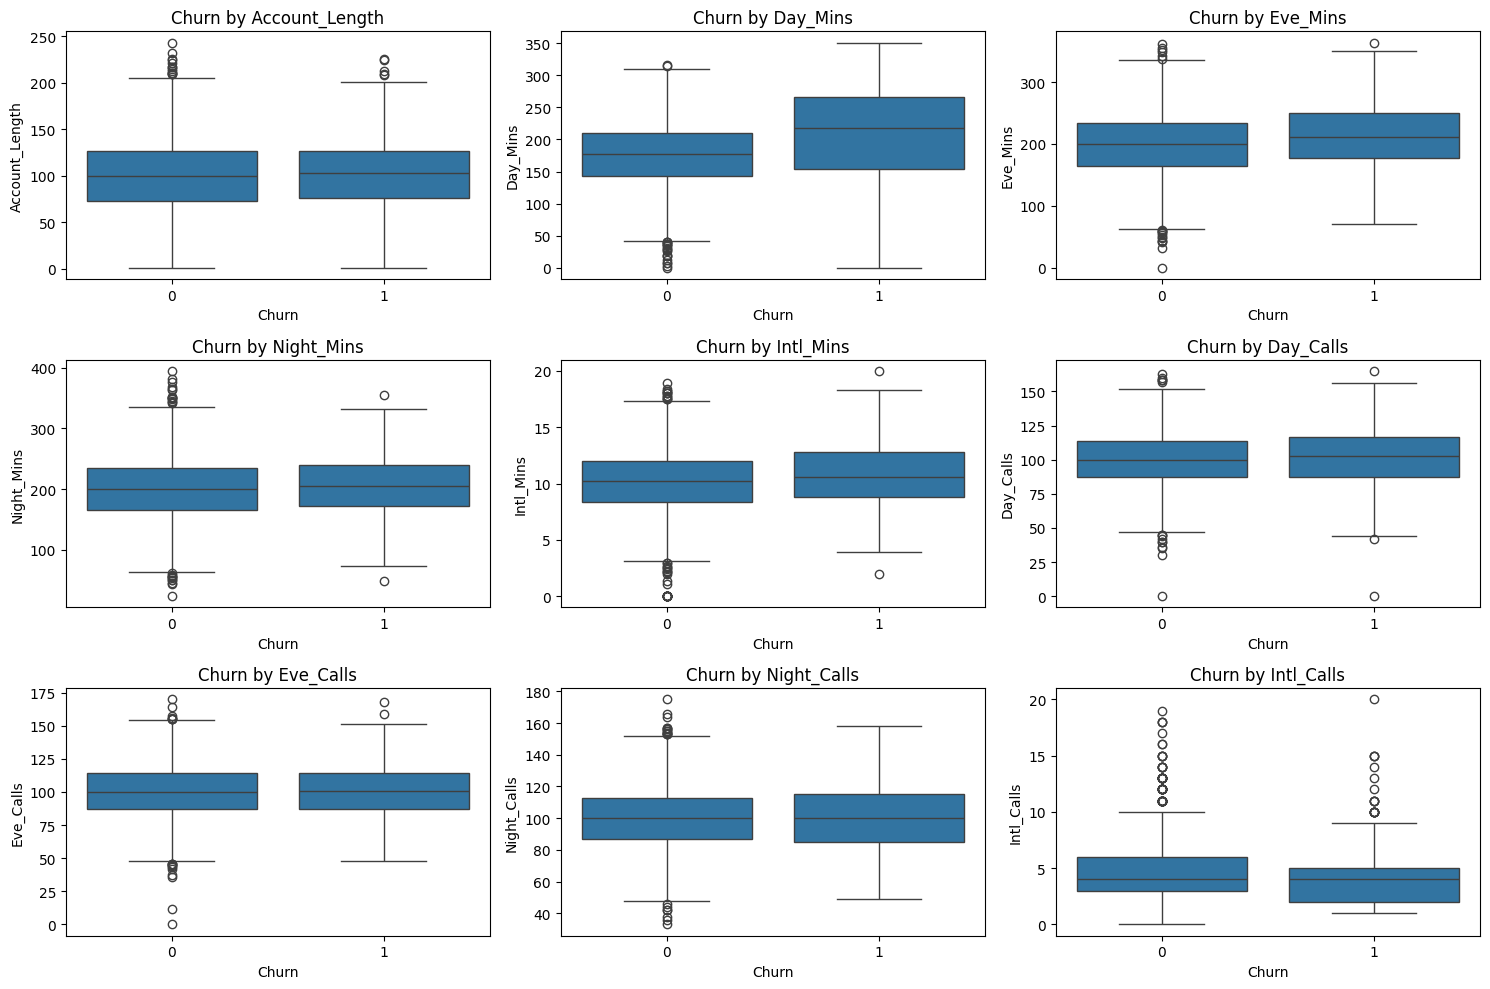

In [25]:
# Numerical variables - compare distributions
numerical_cols = ['Account_Length', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
                 'Intl_Mins', 'Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Calls']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=column, data=telco_data)
    plt.title(f'Churn by {column}')
plt.tight_layout()
plt.show()


In [26]:
# List of categorical columns
categorical_cols = ['Churn', 'Intl_Plan', 'Vmail_Plan']

# Display frequency counts for each categorical column
for col in categorical_cols:
    print(f"Frequency counts for {col}:")
    print(telco_data[col].value_counts())
    print("\n")

Frequency counts for Churn:
Churn
0    2850
1     483
Name: count, dtype: int64


Frequency counts for Intl_Plan:
Intl_Plan
no     3010
yes     323
Name: count, dtype: int64


Frequency counts for Vmail_Plan:
Vmail_Plan
no     2411
yes     922
Name: count, dtype: int64




### 3.2. Churn analysis

Calculate overall churn rate

In [27]:
overall_churn_rate = telco_data['Churn'].mean() * 100
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

Overall Churn Rate: 14.49%


In [28]:
telco_data.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [29]:
telco_data['Churn'].value_counts()


,count
Churn,
0,2850
1,483


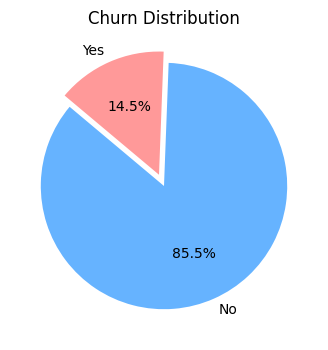

In [30]:
# Get churn counts
churn_counts = telco_data['Churn'].value_counts()

# Define your mapping
churn_labels = {0: 'No', 1: 'Yes'}

# Define explode (still exploding the "Yes" slice)
explode = (0, 0.1)

# Get values in correct order
values = [churn_counts.get(0, 0), churn_counts.get(1, 0)]
labels = ['No', 'Yes']

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#66b3ff','#ff9999'],
        explode=explode)
plt.title('Churn Distribution')
plt.show()

Churn by State

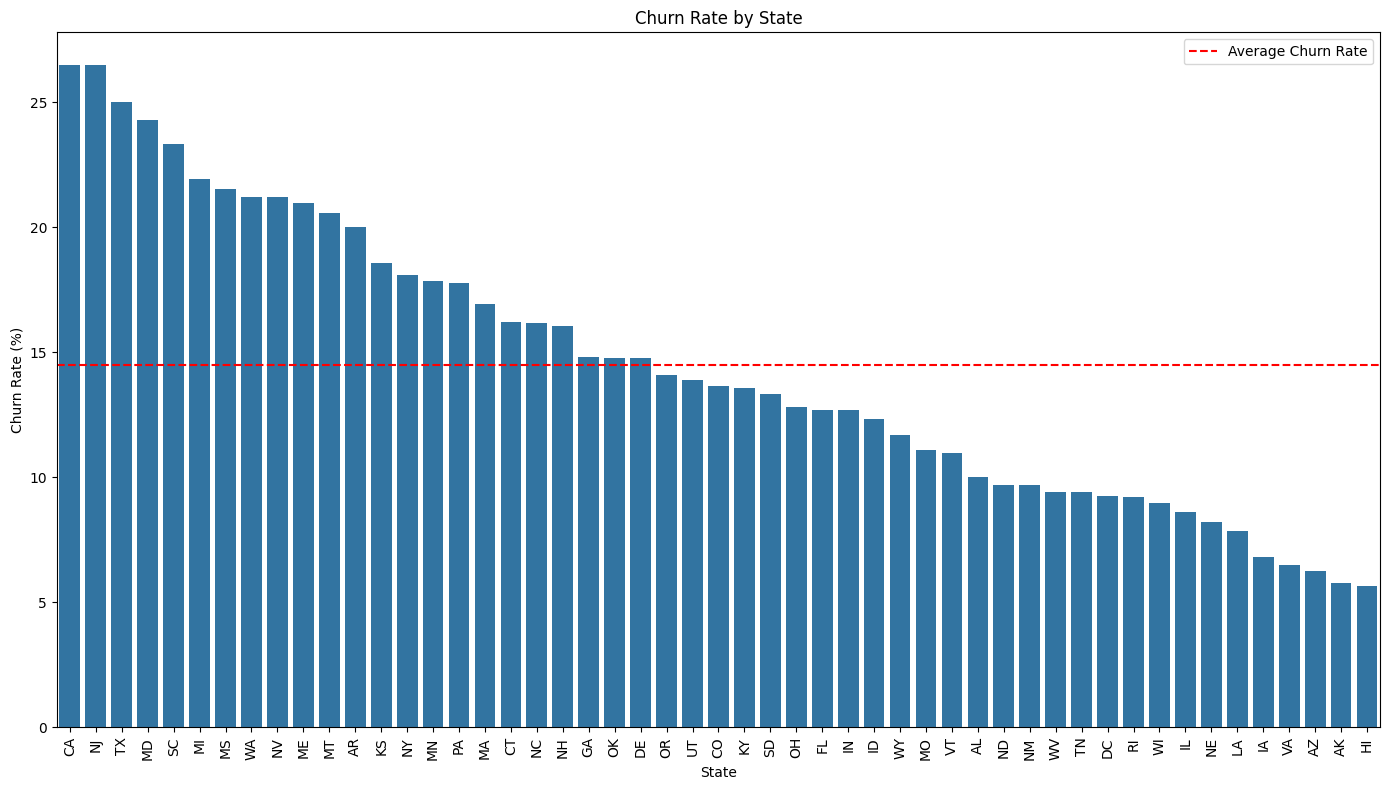

In [31]:
# Calculate churn rate by state
state_churn = telco_data.groupby('State')['Churn'].agg(['mean', 'count'])
state_churn['churn_rate'] = state_churn['mean'] * 100
state_churn = state_churn.sort_values('churn_rate', ascending=False)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x=state_churn.index, y='churn_rate', data=state_churn)
plt.title('Churn Rate by State')
plt.ylabel('Churn Rate (%)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.axhline(y=telco_data['Churn'].mean()*100, color='r', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()



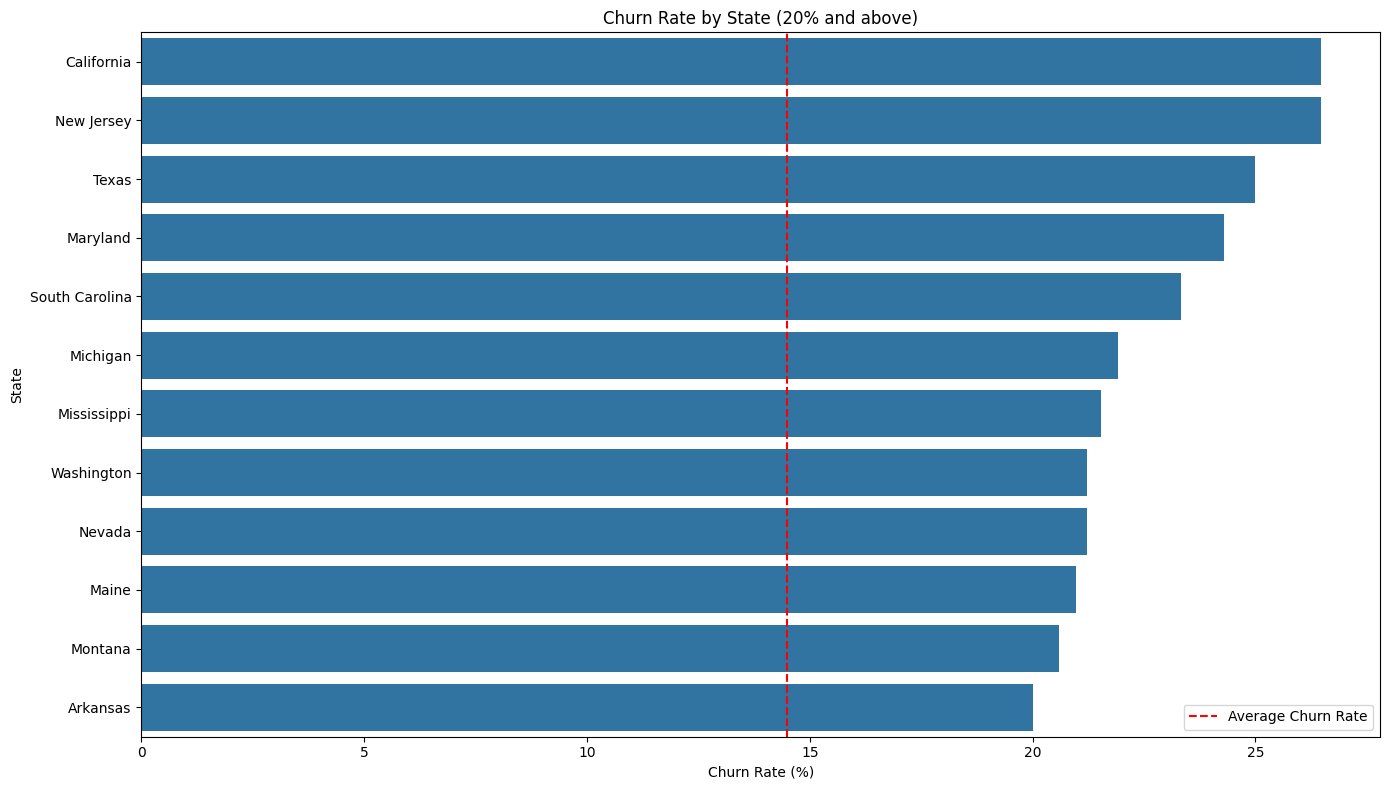

In [32]:
# Filter states with churn rate 20% and above
high_churn_states = state_churn[state_churn['churn_rate'] >= 20]

# Dictionary to map state abbreviations to full names
state_full_names = {
    'CA': 'California', 'NJ': 'New Jersey', 'TX': 'Texas', 'MD': 'Maryland', 'SC': 'South Carolina',
    'MI': 'Michigan', 'MS': 'Mississippi', 'WA': 'Washington', 'NV': 'Nevada', 'ME': 'Maine',
    'MT': 'Montana', 'AR': 'Arkansas', 'KS': 'Kansas', 'NY': 'New York', 'MN': 'Minnesota',
    'PA': 'Pennsylvania'
}

# Replace state abbreviations with full names
high_churn_states.index = high_churn_states.index.map(state_full_names)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(y=high_churn_states.index, x='churn_rate', data=high_churn_states, orient='h')
plt.title('Churn Rate by State (20% and above)')
plt.xlabel('Churn Rate (%)')
plt.ylabel('State')
plt.axvline(x=telco_data['Churn'].mean()*100, color='r', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

Churn by Voicemail and International Plans

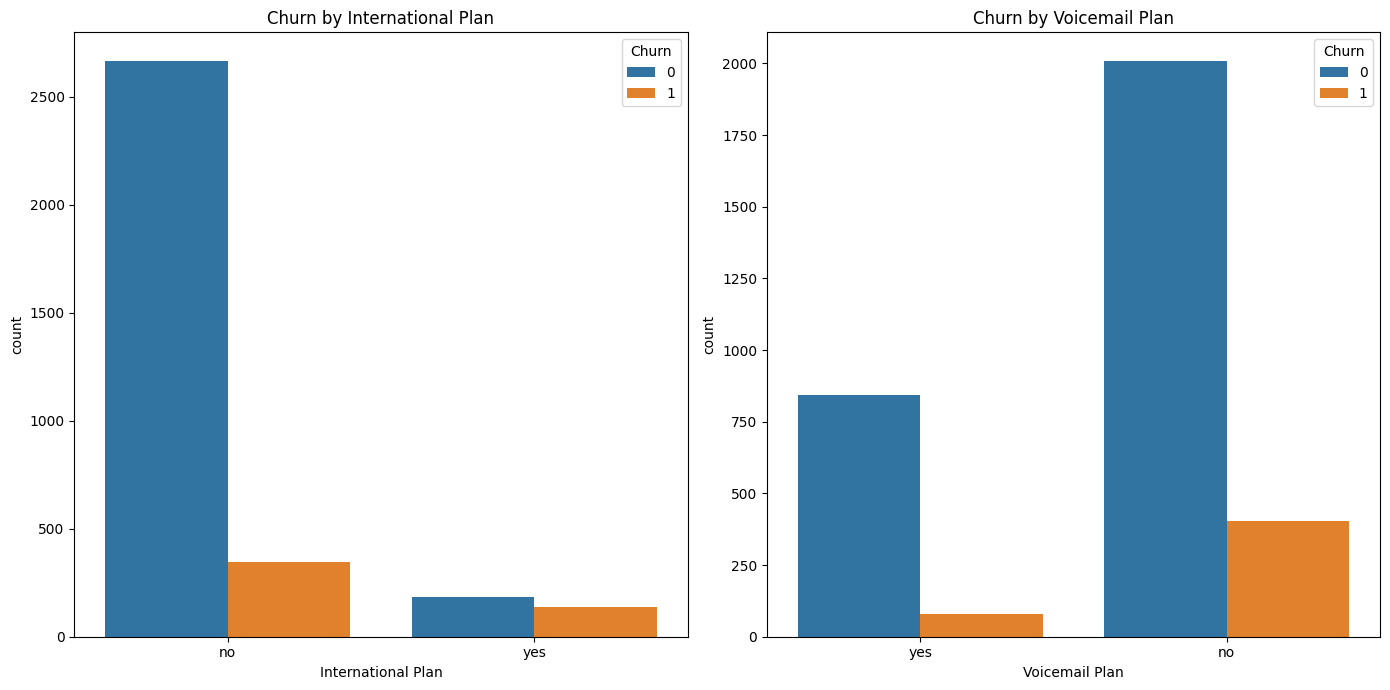

In [33]:
# Plot categorical relationships
plt.figure(figsize=(14, 7))

# Churn by International Plan
plt.subplot(1, 2, 1)
sns.countplot(x='Intl_Plan', hue='Churn', data=telco_data)
plt.xlabel('International Plan')
plt.title('Churn by International Plan')

# Churn by Voicemail Plan
plt.subplot(1, 2, 2)
sns.countplot(x='Vmail_Plan', hue='Churn', data=telco_data)
plt.xlabel('Voicemail Plan')
plt.title('Churn by Voicemail Plan')

plt.tight_layout()
plt.show()


In [34]:
telco_data[telco_data['Intl_Plan'] == 'yes']['Churn'].value_counts()

,count
Churn,
0,186
1,137


In [35]:
(137)/(137+186)

0.4241486068111455

Churn by Customer Service Calls

<Axes: xlabel='Churn', ylabel='CustServ_Calls'>

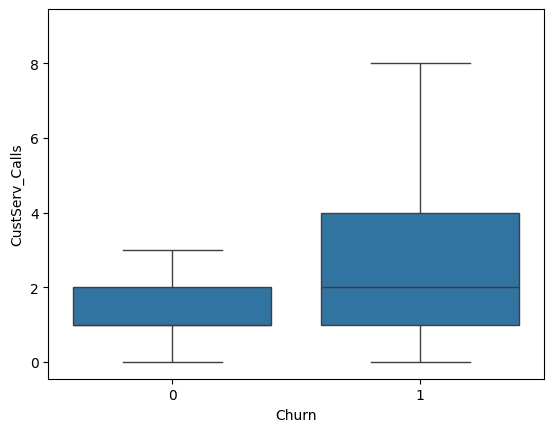

In [36]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco_data,
            fliersize = 0)

<Axes: xlabel='Churn', ylabel='CustServ_Calls'>

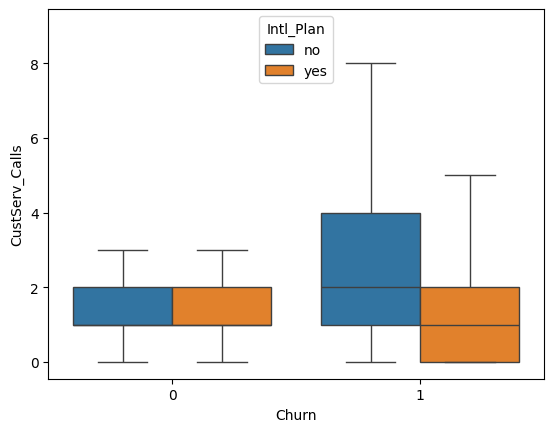

In [37]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco_data,
            fliersize = 0,
            hue = "Intl_Plan")

<Axes: xlabel='Churn', ylabel='CustServ_Calls'>

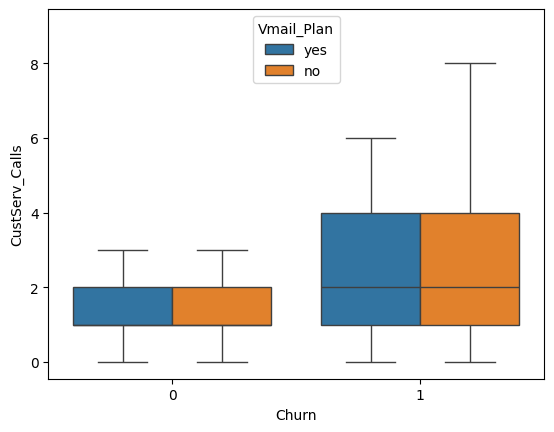

In [38]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco_data,
            fliersize = 0,
            hue = "Vmail_Plan")

#### Preliminary Insights from Churn Analysis

- California and New Jersey exhibit the highest churn rates, followed by Texas, Maryland, and South Carolina.
- Approximately 40% of customers with International plans terminate their service.
- Customers who eventually churn tend to make more customer service calls prior to leaving.


### 3.3. Feature correlations

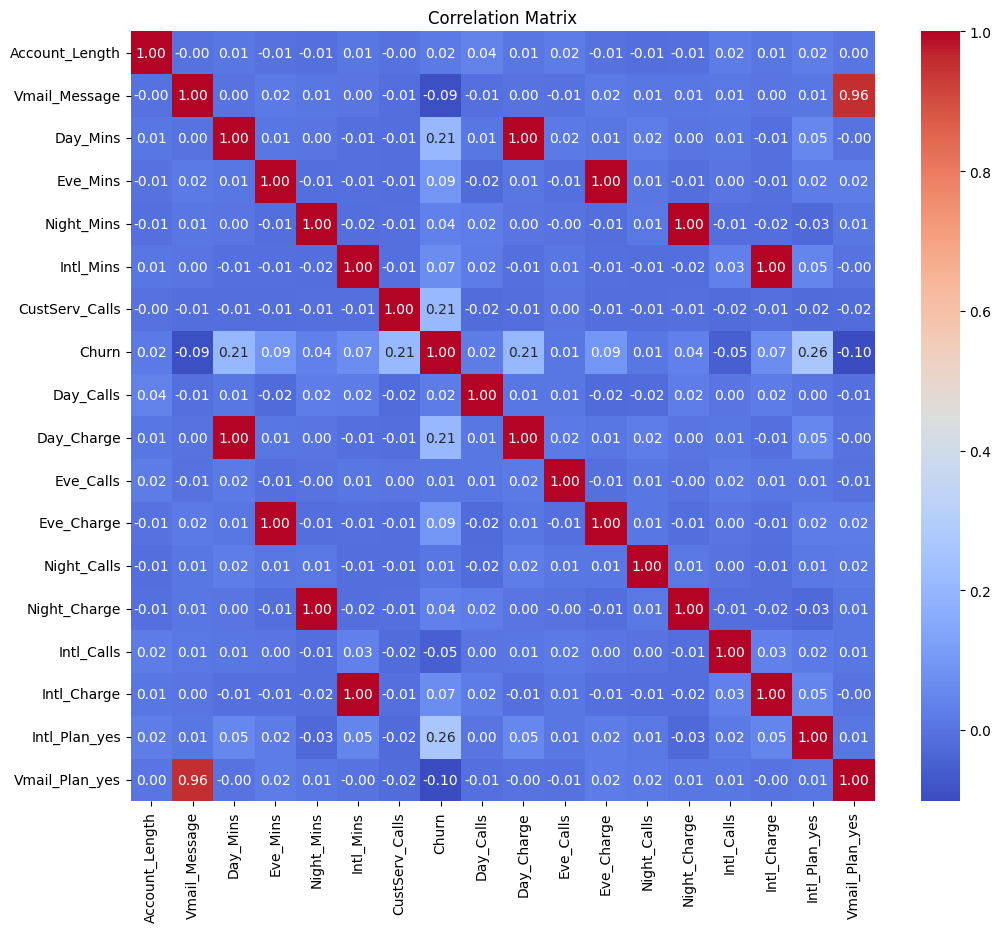

In [39]:
# Correlation matrix
correlation = telco_data.drop(['State', 'Area_Code', 'Phone'], axis=1)
correlation = pd.get_dummies(correlation, drop_first=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# 4. Feature Engineering


### 4.1. Data Encoding

In [40]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [41]:
telco_data[['Vmail_Plan', 'Intl_Plan']]

,Vmail_Plan,Intl_Plan
0,yes,no
1,yes,no
2,no,no
3,no,yes
4,no,yes
...,...,...
3328,yes,no
3329,no,no
3330,no,no
3331,no,yes


In [42]:
# Encode 'Vmail_Plan' and 'Intl_Plan'
telco_data['Vmail_Plan'] = telco_data['Vmail_Plan'].map({'yes': 1, 'no': 0})
telco_data['Intl_Plan'] = telco_data['Intl_Plan'].map({'yes': 1, 'no': 0})

telco_data[['Vmail_Plan', 'Intl_Plan']]

,Vmail_Plan,Intl_Plan
0,1,0
1,1,0
2,0,0
3,0,1
4,0,1
...,...,...
3328,1,0
3329,0,0
3330,0,0
3331,0,1


In [43]:
telco_data['State'].head()

,State
0,KS
1,OH
2,NJ
3,OH
4,OK


In [44]:
# Perform dummy encoding for 'State'
# telco_data = pd.get_dummies(telco_data, columns=['State'], drop_first=True)

# telco_data.head()

### 4.2. Data Standardization

In [45]:
# Scale telco using StandardScaler
from sklearn.preprocessing import StandardScaler

# Select the numerical columns you want to standardize
numerical_columns = ['Account_Length', 'Vmail_Message', 'Day_Mins',
                     'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls']

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
telco_data[numerical_columns] = scaler.fit_transform(telco_data[numerical_columns])

# Now your numerical columns are standardized (mean=0, std=1)
print(telco_data[numerical_columns].describe())


       Account_Length  Vmail_Message      Day_Mins      Eve_Mins  \
count    3.333000e+03   3.333000e+03  3.333000e+03  3.333000e+03   
mean     1.470971e-16   7.035077e-17  7.312216e-16 -6.821892e-17   
std      1.000150e+00   1.000150e+00  1.000150e+00  1.000150e+00   
min     -2.513172e+00  -5.917599e-01 -3.301096e+00 -3.963622e+00   
25%     -6.797448e-01  -5.917599e-01 -6.624241e-01 -6.780300e-01   
50%     -1.627644e-03  -5.917599e-01 -6.887677e-03  8.276141e-03   
75%      6.513740e-01   8.695542e-01  6.725198e-01  6.768330e-01   
max      3.564766e+00   3.134591e+00  3.140422e+00  3.209066e+00   

         Night_Mins     Intl_Mins  CustServ_Calls  
count  3.333000e+03  3.333000e+03    3.333000e+03  
mean   7.887813e-17 -3.336332e-16    8.527366e-18  
std    1.000150e+00  1.000150e+00    1.000150e+00  
min   -3.513648e+00 -3.667413e+00   -1.188218e+00  
25%   -6.698545e-01 -6.223690e-01   -4.279320e-01  
50%    6.485803e-03  2.246393e-02   -4.279320e-01  
75%    6.808485e-01  6.

### 4.3. Feature Engineering

In [46]:
telco_data = telco_data.drop(columns=['Area_Code', 'Phone'])
telco_data.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')

In [47]:
telco_data['Day_Cost'] =  telco_data['Day_Charge'] / telco_data['Day_Mins']
telco_data[['Day_Mins', 'Day_Charge', 'Day_Cost']].head()

,Day_Mins,Day_Charge,Day_Cost
0,1.566767,45.07,28.766244
1,-0.333738,27.47,-82.310134
2,1.168304,41.38,35.418874
3,2.196596,50.90,23.172217
4,-0.240090,28.34,-118.039214


In [52]:
X

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Day_Cost
0,0.676489,1.234883,1.566767,-0.070610,0.866743,-0.085008,-0.427932,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,28.766244
1,0.149065,1.307948,-0.333738,-0.108080,1.058571,1.240482,-0.427932,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,-82.310134
2,0.902529,-0.591760,1.168304,-1.573383,-0.756869,0.703121,-1.188218,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,35.418874
3,-0.428590,-0.591760,2.196596,-2.742865,-0.078551,-1.303026,0.332354,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,23.172217
4,-0.654629,-0.591760,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,-118.039214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,2.038605,-0.432895,0.286348,1.547039,-0.120832,0.332354,0,1,77,26.55,126,18.32,83,12.56,6,2.67,AZ,-61.331336
3329,-0.830437,-0.591760,0.942447,-0.938353,-0.189297,-0.228304,1.092641,0,0,57,39.29,55,13.04,123,8.61,4,2.59,WV,41.689366
3330,-1.835055,-0.591760,0.018820,1.731930,-0.177431,1.383778,0.332354,0,0,109,30.74,58,24.55,91,8.64,6,3.81,RI,1633.400608
3331,2.082955,-0.591760,0.624778,-0.816080,-1.219628,-1.876211,0.332354,1,0,105,36.35,84,13.57,137,6.26,10,1.35,CT,58.180698


# 5. Modeling

### 5.1 Logistic Regression

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
X = telco_data.drop(columns=['Churn', 'State'])
y = telco_data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[834  23]
 [111  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       857
           1       0.58      0.22      0.32       143

    accuracy                           0.87      1000
   macro avg       0.73      0.60      0.62      1000
weighted avg       0.84      0.87      0.84      1000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
logreg.predict(data mới) -> 0/1

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Day_Cost
438,0.299758,-0.59176,-0.454929,2.556286,-0.226871,1.168834,-0.427932,0,0,93,26.35,106,28.10,123,8.52,3,3.65,-57.921079
2674,-0.855553,-0.59176,-1.297762,0.323819,-0.246647,0.918065,-1.188218,0,0,117,18.55,124,18.48,141,8.48,6,3.46,-14.293839
1345,-0.076974,-0.59176,-3.301096,-0.816080,-0.667877,-1.231378,1.852927,0,0,0,0.00,130,13.57,88,7.52,1,1.84,-0.000000
1957,1.153683,-0.59176,0.606415,0.061524,-0.883436,-0.013360,-0.427932,0,0,79,36.18,91,17.35,113,7.03,2,2.75,59.662084
2148,-0.127205,-0.59176,-0.656915,0.467786,0.530551,-0.085008,-0.427932,0,0,102,24.48,73,19.10,91,10.25,7,2.70,-37.265074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,-0.478821,-0.59176,-0.814832,0.712332,-1.632947,2.601796,-1.188218,0,0,102,23.02,122,20.15,91,5.32,4,4.73,-28.251232
2548,0.400220,0.94262,-0.487982,1.229033,-1.302688,0.595649,-0.427932,0,1,112,26.04,110,22.38,85,6.08,7,3.21,-53.362665
2916,0.073719,-0.59176,-1.215131,-0.835801,-0.260491,0.094112,0.332354,0,0,87,19.31,98,13.48,87,8.45,6,2.84,-15.891287
2655,-0.930899,-0.59176,0.723934,-0.670141,-0.780600,-0.085008,-0.427932,0,0,73,37.26,65,14.20,119,7.26,5,2.70,51.468750


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 5.2. Decision Tree

In [ ]:
# prompt: import Decision Tree from sklearn

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dtree = DecisionTreeClassifier()

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
print("Decision Tree - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))
print("\nDecision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dtree))

# Compute the confusion matrix for Decision Tree
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable, excluding State variables
X = telco_data.drop(columns=['Churn'] + [col for col in telco_data.columns if col.startswith('State_')])
y = telco_data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
y_pred = dtree.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Get the feature importance from the Decision Tree model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dtree.feature_importances_
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Decision Tree')
plt.show()

### Top Factors Influencing Churn

- Day_Charge (0.14): The strongest predictor of churn, indicating customers are highly sensitive to daytime usage charges.
- CustServ_Calls (0.11): High number of customer service calls strongly correlates with eventual churn, suggesting service issues or dissatisfaction.
- Intl_Mins (0.10): International calling minutes significantly impact churn decisions.
- Day_Mins (0.09): High daytime usage minutes correlate with increased churn probability.
- Intl_Plan (0.07): Having an international plan affects churn likelihood substantially.

